## Imports

In [1]:
using ChaosTools
using DifferentialEquations
using Plots
using LinearAlgebra
using Plots.PlotMeasures
using LaTeXStrings
using JLD2
using NPZ
using Distributions
using DynamicalSystems

In [2]:
include("Network.jl")

Main.Network

## Parameter structure

In [3]:
# Define a parameter struct that contains the scalar parameters and the matrix
struct Params
    scalar_params::Vector{Float64}  # Vector of scalar parameters (e.g., p[1], p[2], ...)
    matrix_params::Matrix{Float64}  # The normalized connectivity matrix
end

# $\epsilon = 8, I_{ext}^E=10$

In [4]:
Nvariables = 6
Npop = 90

# Initial conditions
u0 = zeros(Npop*Nvariables)

# Time span
# Initial time
t0 = 0
# Final time
tf = 500
tspan = (t0, tf)

# Define the parameters as a dictionary
scalar_params = [8,8,1,5,-5,-5,1,1,5,13,5,13,0,10,8];

# Load the .npz file containing the connectivity matrix into a dictionary-like structure
data = load("NormalizedMatrix.npz")
W = data["normalized_matrix"]

# Create the Params struct
p = Params(scalar_params, W)


Params([8.0, 8.0, 1.0, 5.0, -5.0, -5.0, 1.0, 1.0, 5.0, 13.0, 5.0, 13.0, 0.0, 10.0, 8.0], [0.0 0.07150787333365484 … 0.029938437471751827 0.0457088009950454; 0.040356800998807764 0.0 … 0.0844727476667492 0.0069661426632191365; … ; 0.011030461432017217 0.05514665431799544 … 0.0 0.055906608276557586; 0.029621282116852266 0.007999004709306763 … 0.09833390557208707 0.0])

In [41]:
dt = 0.01
ns = 1
tmax = 3e3
trans = 3e2
Nsteps = Int(tmax/ns)

3000

# A. No tangent

## Example 1: Lliure integrator

In [14]:
ds=ContinuousDynamicalSystem(Network.Network!, u0, p)#; diffeq=(alg=RK4(),dt=dt,adaptive=false))

540-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      true
 dynamic rule:  Network!
 ODE solver:    Tsit5
 ODE kwargs:    (abstol = 1.0e-6, reltol = 1.0e-6)
 parameters:    Params([8.0, 8.0, 1.0, 5.0, -5.0, -5.0, 1.0, 1.0, 5.0, 13.0, 5.0, 13.0, 0.0, 10.0, 8.0], [0.0 0.07150787333365484 … 0.029938437471751827 0.0457088009950454; 0.040356800998807764 0.0 … 0.0844727476667492 0.0069661426632191365; … ; 0.011030461432017217 0.05514665431799544 … 0.0 0.055906608276557586; 0.029621282116852266 0.007999004709306763 … 0.09833390557208707 0.0])
 time:          0.0
 state:         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [15]:
λ = lyapunovspectrum(ds, Nsteps,6; Δt = ns, Ttr=trans,show_progress=true)

Lyapunov spectrum: 100%|████████████████████████████████| Time: 0:03:16


6-element Vector{Float64}:
 -0.000126591283713094
 -0.010703997180999215
 -0.02638453784201392
 -0.026436540454554784
 -0.026546082462182017
 -0.02651332696718724

## Example 2: RK4 + tolerance

In [17]:
ds=ContinuousDynamicalSystem(Network.Network!, u0, p; diffeq=(alg=RK4(),abstol = 1.0e-6, reltol = 1.0e-6))

540-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      true
 dynamic rule:  Network!
 ODE solver:    RK4
 ODE kwargs:    (abstol = 1.0e-6, reltol = 1.0e-6)
 parameters:    Params([8.0, 8.0, 1.0, 5.0, -5.0, -5.0, 1.0, 1.0, 5.0, 13.0, 5.0, 13.0, 0.0, 10.0, 8.0], [0.0 0.07150787333365484 … 0.029938437471751827 0.0457088009950454; 0.040356800998807764 0.0 … 0.0844727476667492 0.0069661426632191365; … ; 0.011030461432017217 0.05514665431799544 … 0.0 0.055906608276557586; 0.029621282116852266 0.007999004709306763 … 0.09833390557208707 0.0])
 time:          0.0
 state:         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [18]:
λ = lyapunovspectrum(ds, Nsteps,6; Δt = ns, Ttr=trans,show_progress=true)

Lyapunov spectrum: 100%|████████████████████████████████| Time: 0:07:22


6-element Vector{Float64}:
 -0.00011349246762648986
 -0.010689293727931305
 -0.02630882793441736
 -0.026336922386198565
 -0.026362491227020828
 -0.0263855562661227

## Example 3: Tsit + step + adaptatiu

In [19]:
ds=ContinuousDynamicalSystem(Network.Network!, u0, p; diffeq=(alg=Tsit5(),dt=dt,adaptive=true))

540-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      true
 dynamic rule:  Network!
 ODE solver:    Tsit5
 ODE kwargs:    (dt = 0.01, adaptive = true)
 parameters:    Params([8.0, 8.0, 1.0, 5.0, -5.0, -5.0, 1.0, 1.0, 5.0, 13.0, 5.0, 13.0, 0.0, 10.0, 8.0], [0.0 0.07150787333365484 … 0.029938437471751827 0.0457088009950454; 0.040356800998807764 0.0 … 0.0844727476667492 0.0069661426632191365; … ; 0.011030461432017217 0.05514665431799544 … 0.0 0.055906608276557586; 0.029621282116852266 0.007999004709306763 … 0.09833390557208707 0.0])
 time:          0.0
 state:         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [20]:
λ = lyapunovspectrum(ds, Nsteps,6; Δt = ns, Ttr=trans,show_progress=true)

Lyapunov spectrum: 100%|████████████████████████████████| Time: 0:02:33


6-element Vector{Float64}:
 0.07393151079545554
 0.04782529221042953
 0.03391691939095815
 0.026486259506283152
 0.021593355349179156
 0.014313321504100827

## Example 4: RK4 + step + adaptatiu (adaptatiu=true va malament)

In [12]:
ds=ContinuousDynamicalSystem(Network.Network!, u0, p; diffeq=(alg=RK4(),dt=dt,adaptive=true))

540-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      true
 dynamic rule:  Network!
 ODE solver:    RK4
 ODE kwargs:    (dt = 0.01, adaptive = true)
 parameters:    Params([8.0, 8.0, 1.0, 5.0, -5.0, -5.0, 1.0, 1.0, 5.0, 13.0, 5.0, 13.0, 0.0, 10.0, 8.0], [0.0 0.07150787333365484 … 0.029938437471751827 0.0457088009950454; 0.040356800998807764 0.0 … 0.0844727476667492 0.0069661426632191365; … ; 0.011030461432017217 0.05514665431799544 … 0.0 0.055906608276557586; 0.029621282116852266 0.007999004709306763 … 0.09833390557208707 0.0])
 time:          0.0
 state:         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [13]:
λ = lyapunovspectrum(ds, Nsteps, 6; Δt = ns, Ttr=trans,show_progress=true)

Lyapunov spectrum: 100%|████████████████████████████████| Time: 0:02:43


6-element Vector{Float64}:
  0.001782030347746823
 -0.009196638390038621
 -0.02553737375429278
 -0.025473464721401055
 -0.025575504536579613
 -0.02551311907692924

## Example 5: Tsit5 + step + no adaptatiu --> Massa lento

In [21]:
ds=ContinuousDynamicalSystem(Network.Network!, u0, p; diffeq=(alg=Tsit5(),dt=dt,adaptive=false))

540-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      true
 dynamic rule:  Network!
 ODE solver:    Tsit5
 ODE kwargs:    (dt = 0.01, adaptive = false)
 parameters:    Params([8.0, 8.0, 1.0, 5.0, -5.0, -5.0, 1.0, 1.0, 5.0, 13.0, 5.0, 13.0, 0.0, 10.0, 8.0], [0.0 0.07150787333365484 … 0.029938437471751827 0.0457088009950454; 0.040356800998807764 0.0 … 0.0844727476667492 0.0069661426632191365; … ; 0.011030461432017217 0.05514665431799544 … 0.0 0.055906608276557586; 0.029621282116852266 0.007999004709306763 … 0.09833390557208707 0.0])
 time:          0.0
 state:         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [22]:
λ = lyapunovspectrum(ds, Nsteps, 6; Δt = ns, Ttr=trans,show_progress=true)

Lyapunov spectrum:   2%|▌                               |  ETA: 3:41:11KK

InterruptException: InterruptException:

## Example 6: RK4+step+no adaptatiu  --> Massa lento

In [9]:
ds=ContinuousDynamicalSystem(Network.Network!, u0, p; diffeq=(alg=RK4(),dt=dt,adaptive=false))

540-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      true
 dynamic rule:  Network!
 ODE solver:    RK4
 ODE kwargs:    (dt = 0.01, adaptive = false)
 parameters:    Params([8.0, 8.0, 1.0, 5.0, -5.0, -5.0, 1.0, 1.0, 5.0, 13.0, 5.0, 13.0, 0.0, 10.0, 8.0], [0.0 0.07150787333365484 … 0.029938437471751827 0.0457088009950454; 0.040356800998807764 0.0 … 0.0844727476667492 0.0069661426632191365; … ; 0.011030461432017217 0.05514665431799544 … 0.0 0.055906608276557586; 0.029621282116852266 0.007999004709306763 … 0.09833390557208707 0.0])
 time:          0.0
 state:         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [7]:
tands = TangentDynamicalSystem(ds;k=6)

540-dimensional TangentDynamicalSystem
 deterministic:     true
 discrete time:     false
 in-place:          true
 dynamic rule:      Network!
 jacobian:          #27
 deviation vectors: 6
 parameters:        Params([8.0, 8.0, 1.0, 5.0, -5.0, -5.0, 1.0, 1.0, 5.0, 13.0, 5.0, 13.0, 0.0, 10.0, 8.0], [0.0 0.07150787333365484 … 0.029938437471751827 0.0457088009950454; 0.040356800998807764 0.0 … 0.0844727476667492 0.0069661426632191365; … ; 0.011030461432017217 0.05514665431799544 … 0.0 0.055906608276557586; 0.029621282116852266 0.007999004709306763 … 0.09833390557208707 0.0])
 time:              0.0
 state:             [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [10]:
λ = lyapunovspectrum(ds, Nsteps, 6; Δt = ns, Ttr=trans,show_progress=true)

Lyapunov spectrum:   3%|▊                               |  ETA: 1:46:46K

InterruptException: InterruptException:

# B. With tangent --> Seems to do the same

## Example 1: Lliure integrator k=6

In [23]:
ds=ContinuousDynamicalSystem(Network.Network!, u0, p)

540-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      true
 dynamic rule:  Network!
 ODE solver:    Tsit5
 ODE kwargs:    (abstol = 1.0e-6, reltol = 1.0e-6)
 parameters:    Params([8.0, 8.0, 1.0, 5.0, -5.0, -5.0, 1.0, 1.0, 5.0, 13.0, 5.0, 13.0, 0.0, 10.0, 8.0], [0.0 0.07150787333365484 … 0.029938437471751827 0.0457088009950454; 0.040356800998807764 0.0 … 0.0844727476667492 0.0069661426632191365; … ; 0.011030461432017217 0.05514665431799544 … 0.0 0.055906608276557586; 0.029621282116852266 0.007999004709306763 … 0.09833390557208707 0.0])
 time:          0.0
 state:         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [24]:
tands = TangentDynamicalSystem(ds; k=6)

540-dimensional TangentDynamicalSystem
 deterministic:     true
 discrete time:     false
 in-place:          true
 dynamic rule:      Network!
 jacobian:          #27
 deviation vectors: 6
 parameters:        Params([8.0, 8.0, 1.0, 5.0, -5.0, -5.0, 1.0, 1.0, 5.0, 13.0, 5.0, 13.0, 0.0, 10.0, 8.0], [0.0 0.07150787333365484 … 0.029938437471751827 0.0457088009950454; 0.040356800998807764 0.0 … 0.0844727476667492 0.0069661426632191365; … ; 0.011030461432017217 0.05514665431799544 … 0.0 0.055906608276557586; 0.029621282116852266 0.007999004709306763 … 0.09833390557208707 0.0])
 time:              0.0
 state:             [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [25]:
λ = lyapunovspectrum(tands, Nsteps; Δt = ns, Ttr=trans,show_progress=true)

Lyapunov spectrum: 100%|████████████████████████████████| Time: 0:03:18


6-element Vector{Float64}:
 -0.000126591283713094
 -0.010703997180999215
 -0.02638453784201392
 -0.026436540454554784
 -0.026546082462182017
 -0.02651332696718724

## Example 2: Lliure integrator k=90 + increase ttrans

In [67]:
dt = 0.01
ns = 1
tmax = 3e3
trans = 3e2
Nsteps = Int(tmax/ns)

3000

In [68]:
ds=ContinuousDynamicalSystem(Network.Network!, u0, p)

540-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      true
 dynamic rule:  Network!
 ODE solver:    Tsit5
 ODE kwargs:    (abstol = 1.0e-6, reltol = 1.0e-6)
 parameters:    Params([8.0, 8.0, 1.0, 5.0, -5.0, -5.0, 1.0, 1.0, 5.0, 13.0, 5.0, 13.0, 0.0, 10.0, 8.0], [0.0 0.07150787333365484 … 0.029938437471751827 0.0457088009950454; 0.040356800998807764 0.0 … 0.0844727476667492 0.0069661426632191365; … ; 0.011030461432017217 0.05514665431799544 … 0.0 0.055906608276557586; 0.029621282116852266 0.007999004709306763 … 0.09833390557208707 0.0])
 time:          0.0
 state:         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [69]:
tands = TangentDynamicalSystem(ds; k=90)

540-dimensional TangentDynamicalSystem
 deterministic:     true
 discrete time:     false
 in-place:          true
 dynamic rule:      Network!
 jacobian:          #27
 deviation vectors: 90
 parameters:        Params([8.0, 8.0, 1.0, 5.0, -5.0, -5.0, 1.0, 1.0, 5.0, 13.0, 5.0, 13.0, 0.0, 10.0, 8.0], [0.0 0.07150787333365484 … 0.029938437471751827 0.0457088009950454; 0.040356800998807764 0.0 … 0.0844727476667492 0.0069661426632191365; … ; 0.011030461432017217 0.05514665431799544 … 0.0 0.055906608276557586; 0.029621282116852266 0.007999004709306763 … 0.09833390557208707 0.0])
 time:              0.0
 state:             [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [70]:
λ = lyapunovspectrum(tands, Nsteps; Δt = ns, Ttr=trans,show_progress=true)

Lyapunov spectrum: 100%|████████████████████████████████| Time: 0:03:37


90-element Vector{Float64}:
 -6.238922445088513e-5
 -0.010615083581192447
 -0.026459564539651457
 -0.026456917594741395
 -0.0264874177427997
 -0.02665078249852515
 -0.02681015248470752
 -0.026889261086938277
 -0.026692292052472866
 -0.02660096137996789
  ⋮
 -0.03074788201953603
 -0.03073324412756975
 -0.031090663027901606
 -0.03182039045570309
 -0.031206821300369253
 -0.03137666137262717
 -0.031703391610528195
 -0.032509765662382444
 -0.03214560558819231

## Example 3: Lliure integrator +  k=90 + Jacobian :-)

In [63]:
dt = 0.01
ns = 1
tmax = 3e3
trans = 3e2
Nsteps = Int(tmax/ns)

3000

In [64]:
ds=ContinuousDynamicalSystem(Network.Network!, u0, p)#,diffeq=(alg=RK4(),dt=dt,adaptive=false))

540-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      true
 dynamic rule:  Network!
 ODE solver:    Tsit5
 ODE kwargs:    (abstol = 1.0e-6, reltol = 1.0e-6)
 parameters:    Params([8.0, 8.0, 1.0, 5.0, -5.0, -5.0, 1.0, 1.0, 5.0, 13.0, 5.0, 13.0, 0.0, 10.0, 8.0], [0.0 0.07150787333365484 … 0.029938437471751827 0.0457088009950454; 0.040356800998807764 0.0 … 0.0844727476667492 0.0069661426632191365; … ; 0.011030461432017217 0.05514665431799544 … 0.0 0.055906608276557586; 0.029621282116852266 0.007999004709306763 … 0.09833390557208707 0.0])
 time:          0.0
 state:         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [65]:
tands = TangentDynamicalSystem(ds; k=90,J=Network.JacobianNetwork!)

540-dimensional TangentDynamicalSystem
 deterministic:     true
 discrete time:     false
 in-place:          true
 dynamic rule:      Network!
 jacobian:          JacobianNetwork!
 deviation vectors: 90
 parameters:        Params([8.0, 8.0, 1.0, 5.0, -5.0, -5.0, 1.0, 1.0, 5.0, 13.0, 5.0, 13.0, 0.0, 10.0, 8.0], [0.0 0.07150787333365484 … 0.029938437471751827 0.0457088009950454; 0.040356800998807764 0.0 … 0.0844727476667492 0.0069661426632191365; … ; 0.011030461432017217 0.05514665431799544 … 0.0 0.055906608276557586; 0.029621282116852266 0.007999004709306763 … 0.09833390557208707 0.0])
 time:              0.0
 state:             [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [66]:
λ = lyapunovspectrum(tands, Nsteps; Δt = ns, Ttr=trans,show_progress=true)

Lyapunov spectrum: 100%|████████████████████████████████| Time: 0:01:17


90-element Vector{Float64}:
 -6.23892244508915e-5
 -0.010615083581192477
 -0.026459564539651332
 -0.026456917594741374
 -0.026487417742799647
 -0.026650782498525257
 -0.02681015248470757
 -0.026889261086938204
 -0.026692292052472914
 -0.026600961379967914
  ⋮
 -0.030747827660884953
 -0.03073309282590153
 -0.03109085958587089
 -0.03182030720727296
 -0.03120686713630626
 -0.03137658670946391
 -0.03170326557205079
 -0.03250996601126327
 -0.032145364241042716

# $\epsilon = 8, I_{ext}^E=12$

In [75]:
Nvariables = 6
Npop = 90

# Initial conditions
u0 = zeros(Npop*Nvariables)

# Time span
# Initial time
t0 = 0
# Final time
tf = 500
tspan = (t0, tf)

# Define the parameters as a dictionary
scalar_params = [8,8,1,5,-5,-5,1,1,5,13,5,13,0,12,8];

# Load the .npz file containing the connectivity matrix into a dictionary-like structure
data = load("NormalizedMatrix.npz")
W = data["normalized_matrix"]

# Create the Params struct
p = Params(scalar_params, W)

Params([8.0, 8.0, 1.0, 5.0, -5.0, -5.0, 1.0, 1.0, 5.0, 13.0, 5.0, 13.0, 0.0, 12.0, 8.0], [0.0 0.07150787333365484 … 0.029938437471751827 0.0457088009950454; 0.040356800998807764 0.0 … 0.0844727476667492 0.0069661426632191365; … ; 0.011030461432017217 0.05514665431799544 … 0.0 0.055906608276557586; 0.029621282116852266 0.007999004709306763 … 0.09833390557208707 0.0])

In [76]:
dt = 0.01
ns = 1
tmax = 3e3
trans = 3e2
Nsteps = Int(tmax/ns)

3000

### Without Jacobian

In [77]:
ds=ContinuousDynamicalSystem(Network.Network!, u0, p)
tands = TangentDynamicalSystem(ds; k=90)
λ = lyapunovspectrum(tands, Nsteps; Δt = ns, Ttr=trans,show_progress=true)

Lyapunov spectrum: 100%|████████████████████████████████| Time: 0:06:17


90-element Vector{Float64}:
  0.011288754286211958
  0.011013318015005526
  0.010861002356421385
  0.010571827793771358
  0.010444757371233012
  0.010076021555073915
  0.010056183242344198
  0.010105580158929475
  0.009791520918029872
  0.009996413831254696
  ⋮
  0.002540251404408426
  0.0016797596237363873
  0.001843180110057828
  0.0011853236495202918
 -0.0007078535184230811
 -0.003002550541677119
 -0.005033227392549547
 -0.0061551533202719826
 -0.008176468121490237

### With Jacobian

In [74]:
ds=ContinuousDynamicalSystem(Network.Network!, u0, p)
tands = TangentDynamicalSystem(ds; k=90,J=Network.JacobianNetwork!)
λ = lyapunovspectrum(tands, Nsteps; Δt = ns, Ttr=trans,show_progress=true)

Lyapunov spectrum: 100%|████████████████████████████████| Time: 0:02:15


90-element Vector{Float64}:
  0.011288754286211896
  0.011013318015005704
  0.010861002356421014
  0.010571827793770536
  0.010444757371234376
  0.010076021555073976
  0.01005618324234608
  0.010105580158930013
  0.009791520918028677
  0.009996413831257645
  ⋮
  0.0025402514036771077
  0.001679759426293714
  0.0018431802767566656
  0.0011853235974730162
 -0.000707853541424463
 -0.002999840232256155
 -0.005395265745383921
 -0.005883219709670768
 -0.008442817696095855

## $\epsilon = 12, I_{ext}^E = 6$

In [79]:
Nvariables = 6
Npop = 90

# Initial conditions
u0 = zeros(Npop*Nvariables)

# Time span
# Initial time
t0 = 0
# Final time
tf = 500
tspan = (t0, tf)

# Define the parameters as a dictionary
scalar_params = [8,8,1,5,-5,-5,1,1,5,13,5,13,0,6,12];

# Load the .npz file containing the connectivity matrix into a dictionary-like structure
data = load("NormalizedMatrix.npz")
W = data["normalized_matrix"]

# Create the Params struct
p = Params(scalar_params, W)

Params([8.0, 8.0, 1.0, 5.0, -5.0, -5.0, 1.0, 1.0, 5.0, 13.0, 5.0, 13.0, 0.0, 6.0, 12.0], [0.0 0.07150787333365484 … 0.029938437471751827 0.0457088009950454; 0.040356800998807764 0.0 … 0.0844727476667492 0.0069661426632191365; … ; 0.011030461432017217 0.05514665431799544 … 0.0 0.055906608276557586; 0.029621282116852266 0.007999004709306763 … 0.09833390557208707 0.0])

In [80]:
dt = 0.01
ns = 1
tmax = 3e3
trans = 3e2
Nsteps = Int(tmax/ns)

3000

### Without Jacobian

In [82]:
ds=ContinuousDynamicalSystem(Network.Network!, u0, p)
tands = TangentDynamicalSystem(ds; k=90)
λ = lyapunovspectrum(tands, Nsteps; Δt = ns, Ttr=trans,show_progress=true)

Lyapunov spectrum: 100%|████████████████████████████████| Time: 0:02:45


90-element Vector{Float64}:
 -0.0010961154837611383
 -0.041189674730833736
 -0.0411936351134773
 -0.04142828383974139
 -0.04125293691706813
 -0.041820279832214854
 -0.04282505683889495
 -0.04354388001715741
 -0.04513344962303978
 -0.045963073994694195
  ⋮
 -0.0771682949073425
 -0.07677746012619781
 -0.07722727288857185
 -0.0778620573027208
 -0.07785574876361666
 -0.07842498708470434
 -0.07861818345119782
 -0.07885099685507256
 -0.07865076387279395

### With Jacobian

In [81]:
ds=ContinuousDynamicalSystem(Network.Network!, u0, p)
tands = TangentDynamicalSystem(ds; k=90,J=Network.JacobianNetwork!)
λ = lyapunovspectrum(tands, Nsteps; Δt = ns, Ttr=trans,show_progress=true)

Lyapunov spectrum: 100%|████████████████████████████████| Time: 0:00:58


90-element Vector{Float64}:
 -0.0010961154837611496
 -0.04118967473083378
 -0.04119363511347724
 -0.04142828383974144
 -0.04125293691706819
 -0.04182027983221481
 -0.04282505683889497
 -0.043543880017157414
 -0.045133449623039716
 -0.045963073994693994
  ⋮
 -0.077168295301062
 -0.07677746026674105
 -0.07722727247153488
 -0.07786208663616939
 -0.07785572448098808
 -0.07842394902121004
 -0.0786055307575312
 -0.0788508903185677
 -0.07852087455047696

## $\epsilon = 12, I_{ext}^E = 8$

In [84]:
Nvariables = 6
Npop = 90

# Initial conditions
u0 = zeros(Npop*Nvariables)

# Time span
# Initial time
t0 = 0
# Final time
tf = 500
tspan = (t0, tf)

# Define the parameters as a dictionary
scalar_params = [8,8,1,5,-5,-5,1,1,5,13,5,13,0,8,12];

# Load the .npz file containing the connectivity matrix into a dictionary-like structure
data = load("NormalizedMatrix.npz")
W = data["normalized_matrix"]

# Create the Params struct
p = Params(scalar_params, W)

Params([8.0, 8.0, 1.0, 5.0, -5.0, -5.0, 1.0, 1.0, 5.0, 13.0, 5.0, 13.0, 0.0, 8.0, 12.0], [0.0 0.07150787333365484 … 0.029938437471751827 0.0457088009950454; 0.040356800998807764 0.0 … 0.0844727476667492 0.0069661426632191365; … ; 0.011030461432017217 0.05514665431799544 … 0.0 0.055906608276557586; 0.029621282116852266 0.007999004709306763 … 0.09833390557208707 0.0])

In [85]:
dt = 0.01
ns = 1
tmax = 3e3
trans = 3e2
Nsteps = Int(tmax/ns)

3000

### Without Jacobian

In [87]:
ds=ContinuousDynamicalSystem(Network.Network!, u0, p)
tands = TangentDynamicalSystem(ds; k=90)
λ = lyapunovspectrum(tands, Nsteps; Δt = ns, Ttr=trans,show_progress=true)

Lyapunov spectrum: 100%|████████████████████████████████| Time: 0:03:16


90-element Vector{Float64}:
  0.0036624598605921994
  0.0036247897614513575
  0.0035789702646677932
  0.003622698726426203
  0.0036446643816331393
  0.0035159420520426464
  0.0035190166020419764
  0.0033975283697711012
  0.0033360716664500674
  0.0036256659769672533
  ⋮
  6.607336364674228e-5
 -0.0007105509185950129
 -0.0003576843123510748
 -0.002160420403726115
 -0.005045461484393256
 -0.006669364297536885
 -0.008423533056444868
 -0.00931957903815768
 -0.009642092589220632

### With Jacobian

In [86]:
ds=ContinuousDynamicalSystem(Network.Network!, u0, p)
tands = TangentDynamicalSystem(ds; k=90,J=Network.JacobianNetwork!)
λ = lyapunovspectrum(tands, Nsteps; Δt = ns, Ttr=trans,show_progress=true)

Lyapunov spectrum: 100%|████████████████████████████████| Time: 0:01:12


90-element Vector{Float64}:
  0.0036624598605921703
  0.0036247897614513345
  0.00357897026466778
  0.0036226987264261867
  0.0036446643816331337
  0.0035159420520426855
  0.0035190166020419166
  0.0033975283697710674
  0.0033360716664500496
  0.0036256659769672633
  ⋮
  6.607336349431802e-5
 -0.0007105509185569754
 -0.0003576843123473976
 -0.002160420403687139
 -0.005045461484390915
 -0.006669364297536404
 -0.008423533056447417
 -0.009319579038159718
 -0.009642092589220634

### $\epsilon = 12, I_{ext}^E = 12$

In [88]:
Nvariables = 6
Npop = 90

# Initial conditions
u0 = zeros(Npop*Nvariables)

# Time span
# Initial time
t0 = 0
# Final time
tf = 500
tspan = (t0, tf)

# Define the parameters as a dictionary
scalar_params = [8,8,1,5,-5,-5,1,1,5,13,5,13,0,12,12];

# Load the .npz file containing the connectivity matrix into a dictionary-like structure
data = load("NormalizedMatrix.npz")
W = data["normalized_matrix"]

# Create the Params struct
p = Params(scalar_params, W)

Params([8.0, 8.0, 1.0, 5.0, -5.0, -5.0, 1.0, 1.0, 5.0, 13.0, 5.0, 13.0, 0.0, 12.0, 12.0], [0.0 0.07150787333365484 … 0.029938437471751827 0.0457088009950454; 0.040356800998807764 0.0 … 0.0844727476667492 0.0069661426632191365; … ; 0.011030461432017217 0.05514665431799544 … 0.0 0.055906608276557586; 0.029621282116852266 0.007999004709306763 … 0.09833390557208707 0.0])

In [ ]:
dt = 0.01
ns = 1
tmax = 3e3
trans = 3e2
Nsteps = Int(tmax/ns)

## Without Jacobian

In [90]:
ds=ContinuousDynamicalSystem(Network.Network!, u0, p)
tands = TangentDynamicalSystem(ds; k=90)
λ = lyapunovspectrum(tands, Nsteps; Δt = ns, Ttr=trans,show_progress=true)

Lyapunov spectrum: 100%|████████████████████████████████| Time: 0:02:36


90-element Vector{Float64}:
  0.008138043657534665
  0.00846736192118806
  0.007318860240853771
  0.0076608618577828115
  0.007335238370715181
  0.007609586403260774
  0.007360139298635046
  0.0072091583988025554
  0.007021032951684508
  0.007301809971270985
  ⋮
 -0.0014669746696195386
 -0.0008836306815360159
 -0.0013397136882538146
 -0.0012006820768889336
 -0.0008964479205485307
 -0.0012291094843180257
 -0.0009523317232662129
 -0.0008477754477876385
 -0.0004536871551844904

## With Jacobian

In [89]:
ds=ContinuousDynamicalSystem(Network.Network!, u0, p)
tands = TangentDynamicalSystem(ds; k=90,J=Network.JacobianNetwork!)
λ = lyapunovspectrum(tands, Nsteps; Δt = ns, Ttr=trans,show_progress=true)

Lyapunov spectrum: 100%|████████████████████████████████| Time: 0:01:18


90-element Vector{Float64}:
  0.008138043657534637
  0.008467361921188073
  0.007318860240853546
  0.007660861857783373
  0.0073352383707161375
  0.007609586403260488
  0.007360139298634421
  0.007209158398800139
  0.007021032951684259
  0.0073018099712701
  ⋮
 -0.0013109282297880272
 -0.0008193049184372884
 -0.0014466458943020164
 -0.001443664244494756
 -0.0007374331079981854
 -0.0015045905414662092
 -0.001044828994351161
 -0.0006532587944985117
 -0.0003936850818993369

## $\epsilon = 5, I_{ext}^E=10$

In [91]:
Nvariables = 6
Npop = 90

# Initial conditions
u0 = zeros(Npop*Nvariables)

# Time span
# Initial time
t0 = 0
# Final time
tf = 500
tspan = (t0, tf)

# Define the parameters as a dictionary
scalar_params = [8,8,1,5,-5,-5,1,1,5,13,5,13,0,10,5];

# Load the .npz file containing the connectivity matrix into a dictionary-like structure
data = load("NormalizedMatrix.npz")
W = data["normalized_matrix"]

# Create the Params struct
p = Params(scalar_params, W)

Params([8.0, 8.0, 1.0, 5.0, -5.0, -5.0, 1.0, 1.0, 5.0, 13.0, 5.0, 13.0, 0.0, 10.0, 5.0], [0.0 0.07150787333365484 … 0.029938437471751827 0.0457088009950454; 0.040356800998807764 0.0 … 0.0844727476667492 0.0069661426632191365; … ; 0.011030461432017217 0.05514665431799544 … 0.0 0.055906608276557586; 0.029621282116852266 0.007999004709306763 … 0.09833390557208707 0.0])

In [92]:
dt = 0.01
ns = 1
tmax = 3e3
trans = 3e2
Nsteps = Int(tmax/ns)

3000

### Without Jacobian

In [94]:
ds=ContinuousDynamicalSystem(Network.Network!, u0, p)
tands = TangentDynamicalSystem(ds; k=90)
λ = lyapunovspectrum(tands, Nsteps; Δt = ns, Ttr=trans,show_progress=true)

Lyapunov spectrum: 100%|████████████████████████████████| Time: 0:03:44


90-element Vector{Float64}:
  0.00034581043976893876
 -0.0030795801103302213
 -0.004829026166305597
 -0.007594255633142079
 -0.007982703766672246
 -0.010336787026944978
 -0.01289371639377937
 -0.014550557282751224
 -0.015542733078454623
 -0.016383918867471824
  ⋮
 -0.044028597452301914
 -0.04434040282335396
 -0.04513403033035604
 -0.045855183609123024
 -0.04638874944453833
 -0.04823959899814723
 -0.04891866446289902
 -0.04918866560535059
 -0.04911680790568102

### With Jacobian

In [93]:
ds=ContinuousDynamicalSystem(Network.Network!, u0, p)
tands = TangentDynamicalSystem(ds; k=90,J=Network.JacobianNetwork!)
λ = lyapunovspectrum(tands, Nsteps; Δt = ns, Ttr=trans,show_progress=true)

Lyapunov spectrum: 100%|████████████████████████████████| Time: 0:01:18


90-element Vector{Float64}:
  0.00034581043976896224
 -0.003079580110330204
 -0.004829026166305591
 -0.007594255633144086
 -0.007982703766670242
 -0.010336787026945014
 -0.012893716393779365
 -0.01455055728275109
 -0.015542733078454756
 -0.016383918867471835
  ⋮
 -0.044028597452302067
 -0.04434040282335392
 -0.045134030330355776
 -0.045855183609122996
 -0.04638874944453856
 -0.048239598998147316
 -0.048918664462899
 -0.04918866560535042
 -0.04911680790568114

## $\epsilon=5, I_{ext}^E = 14$

In [4]:
Nvariables = 6
Npop = 90

# Initial conditions
u0 = zeros(Npop*Nvariables)

# Time span
# Initial time
t0 = 0
# Final time
tf = 500
tspan = (t0, tf)

# Define the parameters as a dictionary
scalar_params = [8,8,1,5,-5,-5,1,1,5,13,5,13,0,14,5];

# Load the .npz file containing the connectivity matrix into a dictionary-like structure
data = load("NormalizedMatrix.npz")
W = data["normalized_matrix"]

# Create the Params struct
p = Params(scalar_params, W)

Params([8.0, 8.0, 1.0, 5.0, -5.0, -5.0, 1.0, 1.0, 5.0, 13.0, 5.0, 13.0, 0.0, 14.0, 5.0], [0.0 0.07150787333365484 … 0.029938437471751827 0.0457088009950454; 0.040356800998807764 0.0 … 0.0844727476667492 0.0069661426632191365; … ; 0.011030461432017217 0.05514665431799544 … 0.0 0.055906608276557586; 0.029621282116852266 0.007999004709306763 … 0.09833390557208707 0.0])

In [5]:
dt = 0.01
ns = 1
tmax = 3e3
trans = 3e2
Nsteps = Int(tmax/ns)

3000

### Without Jacobian

In [8]:
ds=ContinuousDynamicalSystem(Network.Network!, u0, p)
tands = TangentDynamicalSystem(ds; k=90)
λ = lyapunovspectrum(tands, Nsteps; Δt = ns, Ttr=trans,show_progress=true)

Lyapunov spectrum: 100%|████████████████████████████████| Time: 0:03:04


90-element Vector{Float64}:
  0.0038244962627608714
  0.00354923521466915
  0.0029523074192111445
  0.0014224502717848316
 -0.00024883007648633426
 -0.0007175735065529917
 -0.0022774595466472144
 -0.0043363951676082665
 -0.005535138116703313
 -0.006489845831561313
  ⋮
 -0.06668024237002732
 -0.066721463226642
 -0.06694531741340722
 -0.06692442658388284
 -0.06688290674882091
 -0.06687067341782582
 -0.06663012831097134
 -0.0678752915114288
 -0.06747327027371884

### With Jacobian

In [9]:
ds=ContinuousDynamicalSystem(Network.Network!, u0, p)
tands = TangentDynamicalSystem(ds; k=90,J=Network.JacobianNetwork!)
λ = lyapunovspectrum(tands, Nsteps; Δt = ns, Ttr=trans,show_progress=true)

Lyapunov spectrum: 100%|████████████████████████████████| Time: 0:00:51


90-element Vector{Float64}:
  0.00382449626276089
  0.0035492352146691466
  0.0029523074192111154
  0.0014224502717848594
 -0.00024883007648626954
 -0.0007175735065530806
 -0.002277459546647061
 -0.004336395167608192
 -0.005535138116703405
 -0.006489845831561345
  ⋮
 -0.0666802423703428
 -0.06672146322589696
 -0.06694531741343103
 -0.06692442658398556
 -0.06688290674891417
 -0.06687067341782198
 -0.06663012831094751
 -0.06787529151142951
 -0.0674732702737204

# Network routine

In [48]:
include("LyapunovRoutineNetwork.jl")

Main.LyapunovRoutineNetwork

In [49]:
vector_eps,vectorIext_e,matrix = LyapunovRoutineNetwork.LyapunovNetwork!()

eps = 9.0, Iext_e=8.0
eps = 9.0, Iext_e=8.1
eps = 9.0, Iext_e=8.2
eps = 9.0, Iext_e=8.3
eps = 9.0, Iext_e=8.4
eps = 9.0, Iext_e=8.5
eps = 9.0, Iext_e=8.6
eps = 9.0, Iext_e=8.7
eps = 9.0, Iext_e=8.8
eps = 9.0, Iext_e=8.9
eps = 9.0, Iext_e=9.0
eps = 9.0, Iext_e=9.1
eps = 9.0, Iext_e=9.2
eps = 9.0, Iext_e=9.3
eps = 9.0, Iext_e=9.4
eps = 9.0, Iext_e=9.5
eps = 9.0, Iext_e=9.6
eps = 9.0, Iext_e=9.7
eps = 9.0, Iext_e=9.8
eps = 9.0, Iext_e=9.9
eps = 9.0, Iext_e=10.0
eps = 9.0, Iext_e=10.1
eps = 9.0, Iext_e=10.2
eps = 9.0, Iext_e=10.3
eps = 9.0, Iext_e=10.4
eps = 9.0, Iext_e=10.5
eps = 9.0, Iext_e=10.6
eps = 9.0, Iext_e=10.7
eps = 9.0, Iext_e=10.8
eps = 9.0, Iext_e=10.9
eps = 9.0, Iext_e=11.0
eps = 9.0, Iext_e=11.1
eps = 9.0, Iext_e=11.2
eps = 9.0, Iext_e=11.3
eps = 9.0, Iext_e=11.4
eps = 9.0, Iext_e=11.5
eps = 9.0, Iext_e=11.6
eps = 9.0, Iext_e=11.7
eps = 9.0, Iext_e=11.8
eps = 9.0, Iext_e=11.9
eps = 9.0, Iext_e=12.0
eps = 9.0, Iext_e=12.1
eps = 9.0, Iext_e=12.2
eps = 9.0, Iext_e=12.3
eps = 9.

(9.0:0.1:9.0, 8.0:0.1:16.0, MVector{90, Float64}[[-0.00040042733310932026, -0.03492508499511663, -0.0350397114407457, -0.0349648413090516, -0.0351544045368032, -0.034992956757264146, -0.0356320480217673, -0.03554007264866332, -0.035251300502254376, -0.0354622907617021  …  -0.04117081815905035, -0.041221029889190144, -0.04131887291399867, -0.04109477445016848, -0.04159132481022881, -0.041519939177604305, -0.041881093587065876, -0.04151158483660895, -0.042081518631561954, -0.04213615770510032] [-0.0007959115952700498, -0.03308828567551745, -0.03318982907387912, -0.03311365235816667, -0.03334154327858476, -0.03311527022254149, -0.033738657593913444, -0.03370482951850975, -0.03335627820274601, -0.03365853710265903  …  -0.03928447294280797, -0.0393781361563976, -0.03938409859357668, -0.039048425309672924, -0.03948453394134434, -0.039362162308987064, -0.039714766945675405, -0.03949299263275644, -0.04029928888586687, -0.03986762029494763] … [0.008930414397510652, 0.008650903291424138, 0.00796

In [ ]:
vector_eps2,vectorIext_e2,matrix2 = LyapunovRoutineNetwork.LyapunovNetwork!()

In [25]:
vector_eps[1]

9.0

In [17]:
size(matrix)

(1, 41)

In [42]:
matrix[2][1:6]

6-element Vector{Float64}:
 -0.0007959115952700498
 -0.03308828567551745
 -0.03318982907387912
 -0.03311365235816667
 -0.03334154327858476
 -0.03311527022254149

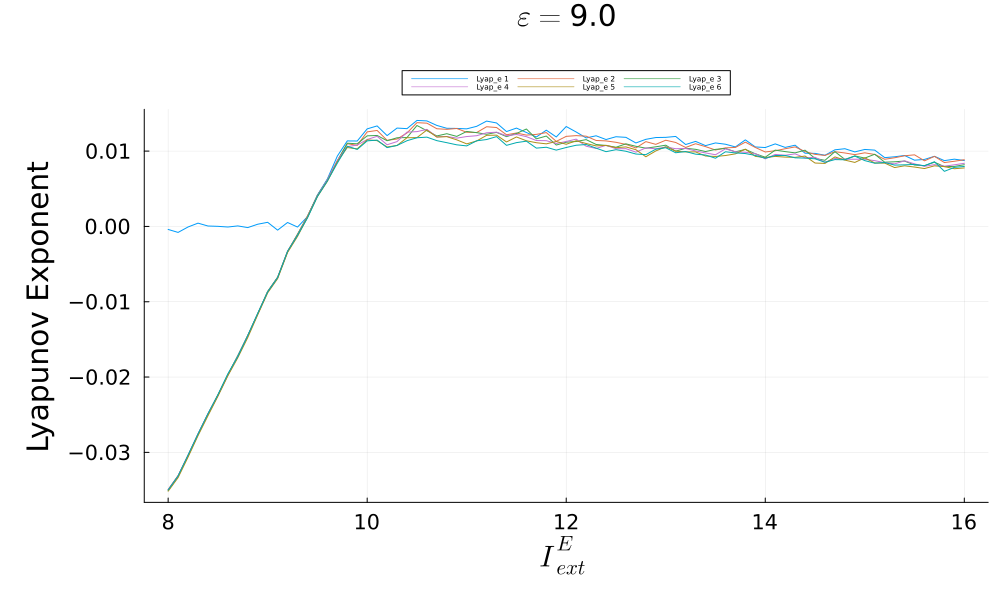

In [53]:
gr()  # Set the backend to GR
plot= scatter()
# Loop over each column and plot it in a different color
for i in 1:6
    plot!(vectorIext_e,[matrix[j][i] for j in 1:length(vectorIext_e)], label="Lyap_e $i",markersize=3,markerstrokewidth=0)
end
# Set title
plot!(title=L"\epsilon = " * string(vector_eps[1]) ,titlefont = font(20),top_margin = 10mm)
# Set labels
xlabel!(L"I_{ext}^E",xguidefontsize=20,bottom_margin = 10mm)
ylabel!("Lyapunov Exponent",yguidefontsize=20,left_margin = 10mm)
plot!(xtickfont=14,ytickfont=14)
# Set the legend to have two columns
plot!(legend=:outertop, legendfontsize=5,legendcolumns=3)
# Set the figure size (make it wider)
plot!(size=(1000, 600)) 
#savefig(plot,"Definitive/Lyapunov_eps = " * string(p[15])*".png")
display(plot) 

## Just increase ttrans

In [50]:
dt = 0.01
ns = 1
tmax = 2e3
trans = 2e2
Nsteps = Int(tmax/ns)

2000

In [51]:
ds=ContinuousDynamicalSystem(Network.Network!, u0, p)

540-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      true
 dynamic rule:  Network!
 ODE solver:    Tsit5
 ODE kwargs:    (abstol = 1.0e-6, reltol = 1.0e-6)
 parameters:    Params([8.0, 8.0, 1.0, 5.0, -5.0, -5.0, 1.0, 1.0, 5.0, 13.0, 5.0, 13.0, 0.0, 10.0, 8.0], [0.0 0.07150787333365484 … 0.029938437471751827 0.0457088009950454; 0.040356800998807764 0.0 … 0.0844727476667492 0.0069661426632191365; … ; 0.011030461432017217 0.05514665431799544 … 0.0 0.055906608276557586; 0.029621282116852266 0.007999004709306763 … 0.09833390557208707 0.0])
 time:          0.0
 state:         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [52]:
tands = TangentDynamicalSystem(ds; k=90,J=Network.JacobianNetwork!)

540-dimensional TangentDynamicalSystem
 deterministic:     true
 discrete time:     false
 in-place:          true
 dynamic rule:      Network!
 jacobian:          JacobianNetwork!
 deviation vectors: 90
 parameters:        Params([8.0, 8.0, 1.0, 5.0, -5.0, -5.0, 1.0, 1.0, 5.0, 13.0, 5.0, 13.0, 0.0, 10.0, 8.0], [0.0 0.07150787333365484 … 0.029938437471751827 0.0457088009950454; 0.040356800998807764 0.0 … 0.0844727476667492 0.0069661426632191365; … ; 0.011030461432017217 0.05514665431799544 … 0.0 0.055906608276557586; 0.029621282116852266 0.007999004709306763 … 0.09833390557208707 0.0])
 time:              0.0
 state:             [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [53]:
λ = lyapunovspectrum(tands, Nsteps; Δt = ns, Ttr=trans,show_progress=true)

Lyapunov spectrum: 100%|████████████████████████████████| Time: 0:00:53


90-element Vector{Float64}:
 -7.957869147605459e-5
 -0.010616698436100446
 -0.02657555920505068
 -0.026555229058311695
 -0.02666441342465885
 -0.026562287579730913
 -0.02704875267075694
 -0.027033937704977865
 -0.026930650634416308
 -0.026681500339213814
  ⋮
 -0.030758955891431402
 -0.030210403347507
 -0.030872386521290776
 -0.03169568343491351
 -0.03092834584631755
 -0.030891574747121345
 -0.03132327863533596
 -0.032595419499519815
 -0.032026414635391236

In [ ]:
#diffeq=(alg=RK4(),dt=dt,adaptive=false)

### Test Jacobian 

In [ ]:
include("Network.jl")

In [ ]:
M = zeros(90*6,90*6)

In [ ]:
init = zeros(90*6)
init[1:Npop].=1
init[1+Npop:idx_se*Npop].=2
init[1+idx_se*Npop:idx_ri*Npop].=3
init[1+idx_ri*Npop:idx_vi*Npop].=4
init[1+idx_vi*Npop:idx_si*Npop].=5
init[1+idx_si*Npop:end].=6

In [ ]:
Network.JacobianNetwork!(M,init,p,0)

In [ ]:
M

In [ ]:
Npop = 90

# Number of variables
Nvar = 6

# Define necessary indices        
idx_ve = 1
idx_se = 2
idx_ri = 3
idx_vi = 4
idx_si = 5

In [ ]:
i = 1
j = 2
M[1+i*Npop:(i+1)*Npop,1+j*Npop:(j+1)*Npop]

In [ ]:
Network.JacobianNetwork!(ones(90*6,90*6),zeros(90*6),p,0)

In [ ]:
jac_0 = ones(12)